<a href="https://colab.research.google.com/github/juandesages/PDI.Entregas/blob/main/TP3/Tp3_Desages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La actividad propuesta debe permitir seleccionar dos imágenes y con estas poder acceder a un menú que permita realizar las siguientes operaciones entre estas:
En espacio RGB:
Sumas y restas: clampeada y promediada
Es espacio YIQ:
Sumas y Restas: clampeada, promediada, if-ligther, if-darker
El resultado de estas se debe guardar como una nueva imagen.
Se deben mostrar los resultados de todas las operaciones mencionadas.

In [2]:
import imageio
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [19]:
#--------- TPN 1 ---------
#Cargar imagen
def load_image(filename):
    im_in=np.clip(imageio.imread(filename),0,255).astype(np.float)/255. 
    #imagen normalizada
    im=np.zeros((*im_in.shape[:2],3))
    image_type = 'RGB'
    if len(im_in.shape)==2: # la imagen es de tipo grayscale
        for i in range (3):
            im[:,:,i]=im_in
            image_type = 'grayscale'
    elif (im_in.shape[2]==4):
        im=im_in[:,:,:3]
        image_type = 'RGBA'
    elif im_in.shape==im.shape:
        im=im_in
    return im, image_type

#obtener información de la imagen
def get_data(im, im_type):
  if im_type == 'grayscale':
    h,w, ch = im.shape
    ch = 1
  else:
    h,w, ch = im.shape
  return h,w,ch #height, wide, channels

#guardar imagen
def save_image(im, title):
  im = im*255
  imageio.imwrite(title,im.astype(np.uint8))
  return 

#graficar imagen (mostrar imagen)
def show_image(im, title):
  plt.imshow(im)
  plt.title(title)
  plt.show()
  return 
# Para las siguientes funciones considero que la imagen es RGB, en los casos de escala de grises se "pasaron" a RGB en la funcion cargar imagen
#obtener dato de un pixel
def pixel_data(im, y, x):
  [R,G,B] = im[y,x,:]*255
  return [R,G,B]

#modificar dato de un pixel
def pixel_set(im, y, x, R,G,B):
  im[y,x,0] = R
  im[y,x,1] = G
  im[y,x,2] = B
  return
#--------- TPN 2 ---------
#matriz para transformar de RGB a YIQ
MAT_YIQ = np.array([[0.299, 0.595716, 0.211456],
                    [0.587, -0.274453, -0.522591],
                    [0.114, -0.321263, 0.311135]])
#funcion para pasar una imagen RGB a YIQ
def rgb2yiq(_im):
    _yiq = np.matmul(_im.reshape((-1,3)), MAT_YIQ).reshape(_im.shape)
    return _yiq
#funcion para modificar valores de Y y de IQ
def scale_yiq(_yiq, alpha, beta):
    _yiq[:, :, 0] *= alpha
    _yiq[:, :, 1:3] *= beta   
    return _yiq
#funcion para pasar la imagen de YIQ a RGB
def yiq2rgb(_yiq):
    _rgb = np.matmul(_yiq.reshape((-1,3)),np.linalg.inv(MAT_YIQ)).reshape(_yiq.shape)
    return _rgb
#--------- TPN 3 ---------
#función para recortar las imagenes para que tengan las mismas dimensiones
def image_clip(im_1, im_2):
  size1 = im_1.shape
  size2 = im_2.shape
  clip1 = np.zeros(size1)
  clip2 = np.zeros(size2)
  if size1[0] > size2[0]:
    clip1 = im_1[50:size2[0], :, :]
    clip2 = im_2[50:size2[0], :, :] 
  if size2[0] > size1[0]:
    clip1 = im_1[50:size1[0], :, :]
    clip2 = im_2[50:size1[0], :, :]  
  if size1[0] == size2[0]:
    clip1 = im_1[50:size1[0], :, :]
    clip2 = im_2[50:size1[0], :, :] 
  if size1[1] > size2[1]:
    clip1 = clip1[:, 50:size2[1], :]
    clip2 = clip2[:, 50:size2[1], :] 
  if size2[1] > size1[1]:
    clip1 = clip1[:, 50:size1[1], :]
    clip2 = clip2[:, 50:size1[1], :]  
  
  if size1[1] == size2[1]:
    clip1 = clip1[:, 50:size1[1], :]
    clip2 = clip2[:, 50:size1[1], :]  
  return clip1, clip2
#función para realizar la suma y diferencia en espacio RGB
def sum_rgb(im1, im2):
    res = (im1 + im2) / 2 #suma promediada
    return res
def sum_rgb_clamp(im1, im2):

    return
def diff_rgb(im1, im2):
    res = (im1 - im2 + 1) / 2 #resta promediada
    return res

def diff_rgb_clamp(im1, im2):
    
   
    return 
#función para realizar la suma y resta en espacio YIQ
def sum_yiq(im1, im2):
    im1 = rgb2yiq(im1)
    im2 = rgb2yiq(im2)
    w_1 = np.abs(im1[...,0])[:,:,np.newaxis]
    w_2 = np.abs(im2[..., 0])[:,:,np.newaxis]
    ret = im1 + im2
    ret[...,1:] = 2 * (w_1 * im1[..., 1:]+w_2*im2[..., 1:])/(w_1 + w_2)
    return np.clip( yiq2rgb(ret) / 2, 0, 1)

def sum_yiq_clamp(im1, im2):
    im1 = rgb2yiq(im1)
    im2 = rgb2yiq(im2)
    ret = np.zeros(im1.shape)
    y = im1[0]+im2[0]
    i = (im1[0]*im1[1]+im2[0]*im2[1])/y
    q = (im1[0]*im1[2]+im2[0]*im2[2])/y
    res = [y, i ,q]
    return np.clip( yiq2rgb(ret), 0, 1)
 
 
def diff_yiq(im1, im2):
    im1 = rgb2yiq(im1)
    im2 = rgb2yiq(im2)
    w_1 = np.abs(im1[...,0])[:,:,np.newaxis]
    w_2 = np.abs(im2[..., 0])[:,:,np.newaxis]
    ret = im1 - im2
    ret[...,1:] = 2 * (w_1 * im1[..., 1:]+w_2*im2[..., 1:])/(w_1 + w_2)
    return np.clip((yiq2rgb(ret) + 1) / 2, 0, 1)

def diff_yiq_clamp(im1, im2):
    im1 = rgb2yiq(im1)
    im2 = rgb2yiq(im2)
    ret = np.zeros(im1.shape)
    y = im1[0]-im2[0]
    i = (im1[0]*im1[1]-im2[0]*im2[1])/(im1[0]+im2[0])
    q = (im1[0]*im1[2]-im2[0]*im2[2])/(im1[0]+im2[0])
    res = [y, i ,q]
    return np.clip( yiq2rgb(ret), 0, 1)
 

#funciones if lighter/ ifdarker
def if_darker(im_1, im_2):
    sel = (rgb2yiq(im_1)[..., 0] < rgb2yiq(im_2)[..., 0])[..., np.newaxis]
    ret = im_1 * sel + im_2 * (1 - sel)
    return ret

def if_lighter(im_1, im_2):
    return -if_darker(-im_1, -im_2)

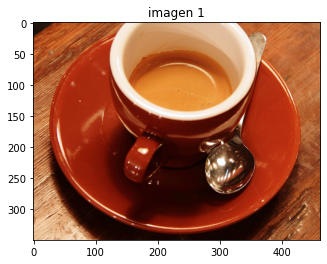

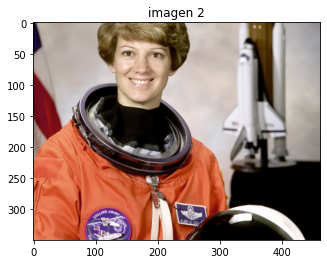

<Figure size 432x288 with 0 Axes>

In [12]:
#@title _Cargar imágenes_ seleccione las imágenes que desea sumar o restar

imagen1 = 'imageio:coffee.png' #@param ['imageio:astronaut.png','imageio:camera.png','imageio:checkerboard.png', 'imageio:chelsea.png', 'imageio:coffee.png','imageio:wikkie.png']
imagen2 = 'imageio:astronaut.png' #@param ['imageio:astronaut.png','imageio:camera.png','imageio:checkerboard.png', 'imageio:chelsea.png', 'imageio:coffee.png','imageio:wikkie.png']

im_1,im1_type = load_image(imagen1)
im_2,im2_type = load_image(imagen2)

im_1, im_2 = image_clip(im_1, im_2)
show_image(im_1,'imagen 1')
plt.savefig('imagen_1.png')
show_image(im_2,'imagen 2')
plt.savefig('imagen_2.png')


Lo primero que podemos notar es que no todas las imagenes del repositorio tienen las mismas dimensiones, por lo que deberiamos recortarlas para poder operar aritméticamente (función clip_image)

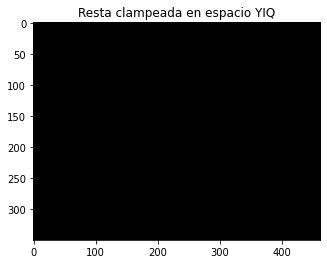

<Figure size 432x288 with 0 Axes>

In [18]:
#@title _Aritmética de píxels_ seleccione la operación a realizar
operacion = 'Resta clampeada en espacio YIQ' #@param ['suma clampeada en espacio RGB','Resta clampeada en espacio RGB','suma promediada en espacio RGB', 'resta promediada en espacio RGB', 'Suma clampeada en espacio YIQ','Suma promediada en espacio YIQ', 'Resta clampeada en espacio YIQ','Resta promediada en espacio YIQ', 'if darker', 'if lighter']
if operacion == 'suma clampeada en espacio RGB': 
  show_image(sum_rgb_clamp(im_1,im_2), operacion)
  plt.savefig(str(operacion)+'.png')
  
if operacion == 'Resta clampeada en espacio RGB': 
  show_image(diff_rgb_clam(im_1,im_2), operacion)
  plt.savefig(str(operacion)+'.png')

if operacion == 'suma promediada en espacio RGB': 
  show_image(sum_rgb(im_1,im_2), operacion)
  plt.savefig(str(operacion)+'.png')
  
if operacion == 'resta promediada en espacio RGB': 
  show_image(diff_rgb(im_1,im_2), operacion)
  plt.savefig(str(operacion)+'.png')

if operacion == 'Suma clampeada en espacio YIQ': 
  show_image(sum_yiq_clamp(im_1,im_2), operacion)
  plt.savefig(str(operacion)+'.png')

if operacion == 'Resta clampeada en espacio YIQ': 
  show_image(sum_yiq_clamp(im_1,im_2), operacion)
  plt.savefig(str(operacion)+'.png')

if operacion == 'Suma promediada en espacio YIQ': 
  show_image(sum_yiq(im_1,im_2), operacion)
  plt.savefig(str(operacion)+'.png')

if operacion == 'Resta promediada en espacio YIQ': 
  show_image(sum_yiq(im_1,im_2), operacion)
  plt.savefig(str(operacion)+'.png')

if operacion == 'if darker': 
  show_image(if_darker(im_1,im_2), operacion)
  plt.savefig(str(operacion)+'.png')

if operacion == 'if lighter': 
  show_image(if_lighter(im_1,im_2), operacion)
  plt.savefig(str(operacion)+'.png')



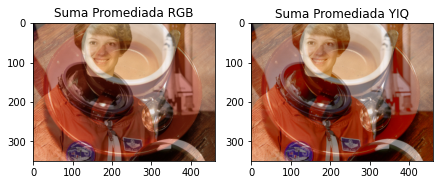

<Figure size 432x288 with 0 Axes>

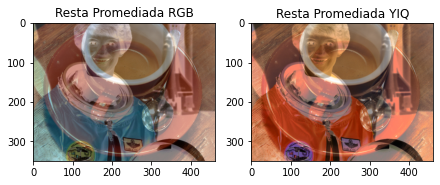

<Figure size 432x288 with 0 Axes>

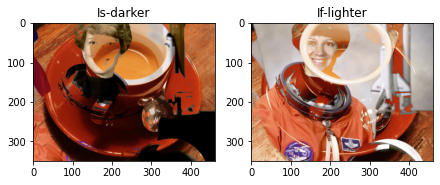

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(1, 2, constrained_layout=True)
im= ax[0].imshow(sum_rgb(im_1,im_2))
ax[0].set_title('Suma Promediada RGB')
im= ax[1].imshow(sum_yiq(im_1,im_2))
ax[1].set_title('Suma Promediada YIQ')

plt.show()
plt.savefig('Comparación Suma Promediada.png')

fig, ax = plt.subplots(1, 2, constrained_layout=True)
im= ax[0].imshow(diff_rgb(im_1,im_2))
ax[0].set_title('Resta Promediada RGB')
im= ax[1].imshow(diff_yiq(im_1,im_2))
ax[1].set_title('Resta Promediada YIQ')

plt.show()
plt.savefig('Comparación Resta Promediada.png')

fig, ax = plt.subplots(1, 2, constrained_layout=True)
im= ax[0].imshow(if_darker(im_1,im_2))
ax[0].set_title('Is-darker')
im= ax[1].imshow(if_lighter(im_1,im_2))
ax[1].set_title('If-lighter')

plt.show()
plt.savefig('Comparación if-darker vs if-lighter.png')

al momento de la entrega, no pude implementar satisfactoriamente las sumas y restas clampeadas.  De las otras operaciones aritméticas puedo concluir que la suma promediada en RGB y YIQ nos dio muy similar, sin variaciones notables a simple vista manteniendo los colores de ambas imagenes, mientras que la resta promediada solo mantuvo la relacion de colores en el espacio YIQ, en RGB se nota mas como una imagen en negativo.
finalmente se puede ver que is darker da como resultado una imagen que es la combinación de ambas manteniendo los pixeles que son mas oscuros, dando una imagen final oscura, mientras que is lighte, al mantener los pixeles mas claros, da por resultado una imagen mas clara

No cambiar el tipo de dato de la imagen al editarla, NO debe estar en formato 'uint8', preferiblemente trabajar en 'float'.
Para trabajar con el espacio YIQ, la imagen o canales RGB deben normalizarse primero.
Clipear los espacios YIQ y RGB. Una vez se han modificado segun los rangos que ustedes conocen.
Al generar la Imagen resultante, esta debe estar en bytes y debe tener formato de imagen 'uint8' antes de ser visualizada.
